In [3]:
import numpy as np
from matplotlib import pyplot 
from numpy.random import normal
from scipy.stats import norm

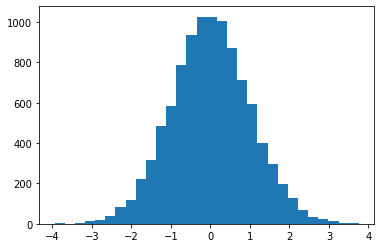

In [4]:
# Se genera un total de 10000 datos aleatorios, basados en una 
#distribución normal
sample = normal(size = 10000) # generador
# Se crea un histograma que se divide en 30 barras
pyplot.hist(sample, bins=30)
pyplot.show()

Los datos aleatorio, a primera vista parece que tomaron valores dea acuerdo a una distribución normal


## Estimación paramétrica

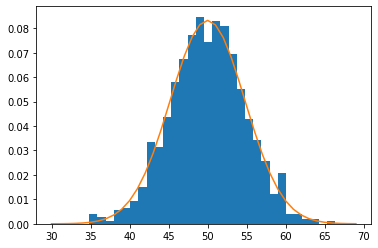

In [6]:
# mu=50 que es promedio, sigma=5, 
sample = normal(loc=50, scale=5, size=1000)
# Valores de probabilidad de los puntos simulados
mu = sample.mean()
sigma = sample.std()
# Valores de la probabilidad teorica
dist = norm(mu,sigma)
values = [value for value in range(30, 70)]
probabilidades = [dist.pdf(value) for value in values]
# Se dibuja los valores, el parametro density normaliza los valores
# es decir que esten entre 0 y 1, para obtener probabilidades
pyplot.hist(sample, bins=30, density=True)
pyplot.plot(values, probabilidades)
pyplot.show()

La curva teórica se ajusta con los datos simulados, sin embargo no son iguales, ya que para obtener esto se necesita datos infinitos, lo cuál es imposible de realizar, sin embargo se puede aumentar los puntos de 1000 a 10000.

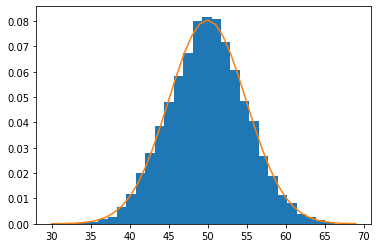

In [7]:
# mu=50 que es promedio, sigma=5, 
sample = normal(loc=50, scale=5, size=10000)
# Valores de probabilidad de los puntos simulados
mu = sample.mean()
sigma = sample.std()
# Valores de la probabilidad teorica
dist = norm(mu,sigma)
values = [value for value in range(30, 70)]
probabilidades = [dist.pdf(value) for value in values]
# Se dibuja los valores, el parametro density normaliza los valores
# es decir que esten entre 0 y 1, para obtener probabilidades
pyplot.hist(sample, bins=30, density=True)
pyplot.plot(values, probabilidades)
pyplot.show()

Se puede observar que los datos simulados se ajustan mucho mas a las teóricas.

# Estimación no paramétrica

No todas las distribuciones de los datos va a presentar una distribución gaussiana, puede que suceda como para este ejemplo, se presente dos distribucciones gaussianas, una al lado de la otra.

`Kernel Density estimation` 
* [parámetro de suavizado]: smoothing parameter 
* [función base]: basis function

https://scikit-learn.org/stable/modules/density.html


In [12]:
# hstack permite unir dos arreglos
from numpy import hstack
# KernelDensity es un metodo para hallar la probabilidad en dos
# distribucciones gaussianas por medio de una sumatoria
from sklearn.neighbors import KernelDensity

#construimos una distribución bimodal
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

# Se crea el modelo, el bandwidth es el suavizado, mientras el kernel
# es como se va a transformar la distribucción
model = KernelDensity(bandwidth=2, kernel='gaussian')
# Tecnica para arreglar la estructura de datos, para trabajar con ellos
# de mejor manera
sample = sample.reshape((len(sample), 1))
# Ajuste de datos
model.fit(sample)

KernelDensity(bandwidth=2)

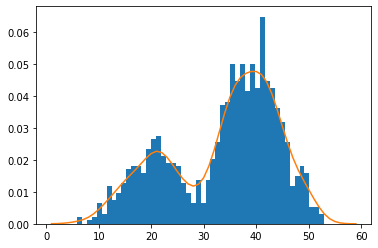

In [13]:
values = np.array([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) #probabilidad logarítmica
probabilities = np.exp(probabilities) # inversión de probabilidad

# Grafica
pyplot.hist(sample, bins=50, density=True)
pyplot.plot(values, probabilities)
pyplot.show()

## Enlaces Externos

[Archivo Clase](https://colab.research.google.com/drive/1yJ5bcLTpH-FDZswnA3yRcfQxuLMt3u4N?usp=sharing)

[numpy.ramdom.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)

[scikit-learn Density Estimation](https://scikit-learn.org/stable/modules/density.html)